# Import data

The first step for any data analysis problem is to import the required datasets. Using pandas is one of the most common and effective methods of importing data. We can also import any other python libraries here that we may use throughout the notebook.

Each dataset imported is stored in a well-named and easily identifiable variable.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
BostonHousingData = pd.read_csv('BostonHousing.csv')

Before any further steps are taken to analyse the data, we should preview the imported datasets as follows.

In [65]:
BostonHousingData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Refer to the documentation of the dataset for explanations of any data or column names that aren't immediately obvious.

Here, *crim* is the Per Capita Criminal Rate, *nox* is Nitric Oxide Concentration, etc. Simply Google the dataset for the full documentation.

*medv* is the target variable, which represents the median value of houses in thousands of dollars.

In [74]:
BostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


The above list shows us some more technical information about the dataset, including the different data types seen in the dataset, how many records there are, and the file size.

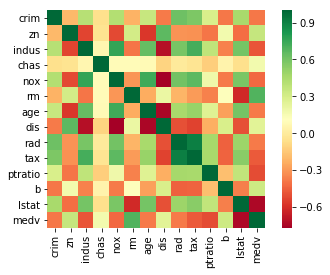

In [73]:
sns.heatmap(BostonHousingData.corr(), square=True, cmap='RdYlGn')

The above heatmap shows the correlation across all the features of the dataset. The stronger the correlation, the greener the sqaure, red being negatively correlated, and yellow suggests little to no correlation.

# Clean data

Datasets are often riddled with missing data, varying types (such as all integer values in a column but a few floating point values), or incorrectly entered (such as in the wrong row or column, misspelled, or factually inaccurate).

To fix this, we can use built-in features of pandas to perhaps loop through the data and check for such values. Functions such as *.loc* can be used to edit the data inplace, without having to resave the dataset.

In this case, a manual review shows that the datasets appear to be completed to a high standard and do not need further cleaning.

# Process data

First, we need to split the data into the *x* and *y* components, or the *feature* and *target* components.

In [30]:
# input data values, aka features
# we are dropping the y-component, the medv column
x = BostonHousingData.drop('medv', axis=1).values

# output data values, aka target
# conversly, we select only the medv column
y = BostonHousingData['medv'].values

With this completed, we can try to predict our target value with just one feature to start, the number of bedrooms.

In [23]:
# slice out the "number of rooms" column
# (we want the whole range of rows, ":", from column 5)
x_rooms = x[:,5]

In [31]:
# check that the new variables are arrays
type(x_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [40]:
# with both being numpy arrays, we can now reshape/resize these as needed
# use the reshape method to keep the first dimension, but add another dimension of size 1 ([] -> [[]])
y = y.reshape(-1, 1)
x_rooms = x_rooms.reshape(-1, 1)

Plotting the data should help us visualise what we are doing and need to do.

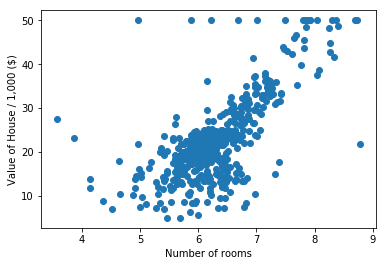

In [75]:
# plot house value (y) as a function of number of rooms (x), i.e. y = f(x)
plt.scatter(x_rooms, y)
plt.ylabel('Value of House / 1,000 ($)')
plt.xlabel('Number of rooms')
plt.show()

## Fitting the Linear Regression model to the data

In [59]:
regression = linear_model.LinearRegression()
# fit the regressor (the regression model) to the data
regression.fit(x_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

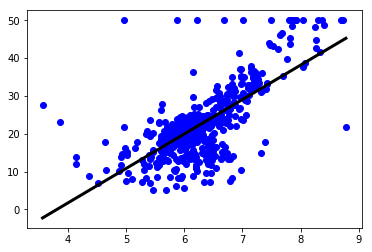

In [76]:
# remember to reshape the data, since we are only using one feature for now
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1, 1);
plt.scatter(x_rooms, y, color='blue')
plt.plot(prediction_space, regression.predict(prediction_space), color='black', linewidth=3)
plt.show()

# Display results

## Calculating the loss/error of the model

A simple method of calculating the line of best fit to our data would be to use the Ordinary Least Squares method, which calculates the vertical distance of each data point to the regression line. The distance from the line to the point is called the *residual* and we would like to mitigate this residual as much as possible.
In SciKit-Learn, the linear regression function that we are using completes this calculation under the hood.

We can split the data into training and testing data, then calculate the score and other metrics of this model.

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=19)
regression_all = linear_model.LinearRegression()
regression_all.fit(x_train, y_train)
y_prediction = regression_all.predict(x_test)

score = regression_all.score(x_test, y_test)
# use the .format() function to format the result to 2 decimal places
print("{:.2f}%".format(score * 100))

68.92%
